# Total CPI Index

# CPI Time Series Analysis
If your aim is to perform time series analysis on the data in your Jupyter notebook, it is generally recommended to convert the Excel file to a CSV (Comma-Separated Values) format for ease of use and compatibility with data analysis libraries in Python.

Here are a few reasons why converting the file to CSV is beneficial:

1. Simplified Data Format: CSV files have a simple structure where each row represents a data record, and the values are separated by commas. This format is easier to work with in Python and can be easily loaded into pandas DataFrames for analysis.

2. Compatibility: Many data analysis libraries in Python, such as pandas and NumPy, have built-in support for reading and manipulating CSV files. These libraries provide a wide range of functionalities for time series analysis and data manipulation.

3. Reduced File Size: CSV files are generally smaller in size compared to Excel files. By converting the file to CSV, you can potentially reduce the file size, making it easier to handle and load into memory.

To convert your Excel file (.xls) to CSV, you can follow these steps:

1. Open the Excel file using Microsoft Excel or a similar spreadsheet software.
2. Go to the "File" menu and choose "Save As" or "Export."
3. Select "CSV (Comma delimited)" or "CSV (Comma Separated Values)" as the file format.
4. Choose a suitable location to save the CSV file and provide a file name.
5. Click "Save" to convert and save the file as CSV.

Once you have the CSV file, you can use pandas to read it into a DataFrame and perform time series analysis on the data in your Jupyter notebook.

In [41]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Reading the Data

In [2]:
# Read the original data
data = pd.read_csv("CPI_2005-2023.csv")

In [3]:
# See the first 10 rows
data.head(10)

,"Tüketici fiyat endeksi ve değişim oranları, 2005-2023",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,Index numbers and rate of changes in the consu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[2003=100],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Yıl,Ocak,Şubat,Mart,Nisan,Mayıs,Haziran,Temmuz,Ağustos,Eylül,Ekim,Kasım,Aralık
3,Year,January,February,March,April,May,June,July,August,September,October,November,December
4,NaN,Endeks - Index,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2005,114.49,114.51,114.81,115.63,116.69,116.81,116.14,117.13,118.33,120.45,122.14,122.65
6,2006,123.57,123.84,124.18,125.84,128.20,128.63,129.72,129.15,130.81,132.47,134.18,134.49
7,2007,135.84,136.42,137.67,139.33,140.03,139.69,138.67,138.70,140.13,142.67,145.45,145.77
8,2008,146.94,148.84,150.27,152.79,155.07,154.51,155.40,155.02,155.72,159.77,161.10,160.44
9,2009,160.90,160.35,162.12,162.15,163.19,163.37,163.78,163.29,163.93,167.88,170.01,170.91


# Data Cleaning

In [4]:
# Remove the unnecessary first rows
data = data.iloc[3:]

# Reset the index of the DataFrame
data = data.reset_index(drop=True)

In [5]:
data.head()

,"Tüketici fiyat endeksi ve değişim oranları, 2005-2023",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,Year,January,February,March,April,May,June,July,August,September,October,November,December
1,NaN,Endeks - Index,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005,114.49,114.51,114.81,115.63,116.69,116.81,116.14,117.13,118.33,120.45,122.14,122.65
3,2006,123.57,123.84,124.18,125.84,128.20,128.63,129.72,129.15,130.81,132.47,134.18,134.49
4,2007,135.84,136.42,137.67,139.33,140.03,139.69,138.67,138.70,140.13,142.67,145.45,145.77


In [6]:
# Remove the second row containing NaN values
data = data.drop(1)

# Reset the index of the DataFrame
data = data.reset_index(drop=True)

In [7]:
data

,"Tüketici fiyat endeksi ve değişim oranları, 2005-2023",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,Year,January,February,March,April,May,June,July,August,September,October,November,December
1,2005,114.49,114.51,114.81,115.63,116.69,116.81,116.14,117.13,118.33,120.45,122.14,122.65
2,2006,123.57,123.84,124.18,125.84,128.20,128.63,129.72,129.15,130.81,132.47,134.18,134.49
3,2007,135.84,136.42,137.67,139.33,140.03,139.69,138.67,138.70,140.13,142.67,145.45,145.77
4,2008,146.94,148.84,150.27,152.79,155.07,154.51,155.40,155.02,155.72,159.77,161.10,160.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,2021,12.53,12.81,13.18,13.70,14.13,14.55,15.15,15.78,16.42,17.09,17.71,19.60
98,2022,22.58,25.98,29.88,34.46,39.33,44.54,49.65,54.69,59.91,65.26,70.36,72.31
99,2023,72.45,71.83,70.20,67.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,"TÜİK, Tüketici Fiyat Endeksi, Nisan 2023",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Get the index data only
data = data.iloc[:20]

# Reset the index of the DataFrame
data = data.reset_index(drop=True)

In [9]:
data

,"Tüketici fiyat endeksi ve değişim oranları, 2005-2023",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,Year,January,February,March,April,May,June,July,August,September,October,November,December
1,2005,114.49,114.51,114.81,115.63,116.69,116.81,116.14,117.13,118.33,120.45,122.14,122.65
2,2006,123.57,123.84,124.18,125.84,128.20,128.63,129.72,129.15,130.81,132.47,134.18,134.49
3,2007,135.84,136.42,137.67,139.33,140.03,139.69,138.67,138.70,140.13,142.67,145.45,145.77
4,2008,146.94,148.84,150.27,152.79,155.07,154.51,155.40,155.02,155.72,159.77,161.10,160.44
5,2009,160.90,160.35,162.12,162.15,163.19,163.37,163.78,163.29,163.93,167.88,170.01,170.91
6,2010,174.07,176.59,177.62,178.68,178.04,177.04,176.19,176.90,179.07,182.35,182.40,181.85
7,2011,182.60,183.93,184.70,186.30,190.81,188.08,187.31,188.67,190.09,196.31,199.70,200.85
8,2012,201.98,203.12,203.96,207.05,206.61,204.76,204.29,205.43,207.55,211.62,212.42,213.23
9,2013,216.74,217.39,218.83,219.75,220.07,221.75,222.44,222.21,223.91,227.94,227.96,229.01


In [16]:
data.to_csv('CPI_index_updated.csv', index=False)

# More Data Cleaning
Some manual data cleaning was performed to get rid of a few more unnecessary issues. The clean version of the dataset is called "CPI_index_clean.csv".

In [17]:
# Read the new data
index_data = pd.read_csv("CPI_index_clean.csv")

# Show the data
index_data

,Year,January,February,March,April,May,June,July,August,September,October,November,December
0,2005,114.49,114.51,114.81,115.63,116.69,116.81,116.14,117.13,118.33,120.45,122.14,122.65
1,2006,123.57,123.84,124.18,125.84,128.20,128.63,129.72,129.15,130.81,132.47,134.18,134.49
2,2007,135.84,136.42,137.67,139.33,140.03,139.69,138.67,138.70,140.13,142.67,145.45,145.77
3,2008,146.94,148.84,150.27,152.79,155.07,154.51,155.40,155.02,155.72,159.77,161.10,160.44
4,2009,160.90,160.35,162.12,162.15,163.19,163.37,163.78,163.29,163.93,167.88,170.01,170.91
5,2010,174.07,176.59,177.62,178.68,178.04,177.04,176.19,176.90,179.07,182.35,182.40,181.85
6,2011,182.60,183.93,184.70,186.30,190.81,188.08,187.31,188.67,190.09,196.31,199.70,200.85
7,2012,201.98,203.12,203.96,207.05,206.61,204.76,204.29,205.43,207.55,211.62,212.42,213.23
8,2013,216.74,217.39,218.83,219.75,220.07,221.75,222.44,222.21,223.91,227.94,227.96,229.01
9,2014,233.54,234.54,237.18,240.37,241.32,242.07,243.17,243.40,243.74,248.37,248.82,247.72


# Visualization of Data

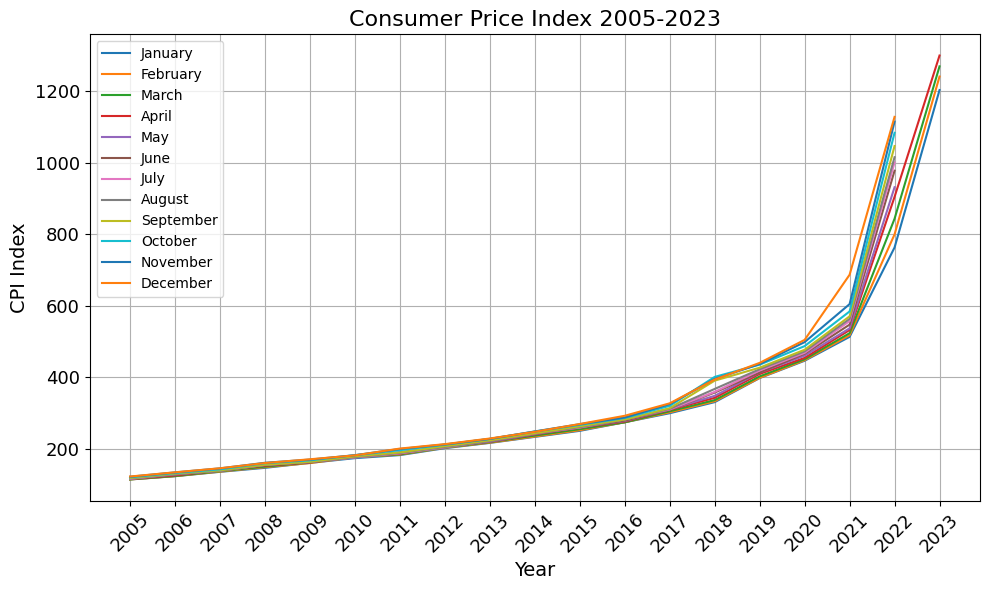

In [19]:
data = index_data

years = data["Year"]

# Select all columns except the 'Year' column
cpi_index = data.iloc[:, 1:]  

# Plot the CPI index over the years
plt.figure(figsize=(10, 6))
plt.plot(years, cpi_index)
plt.xlabel('Year', fontsize=14)
plt.ylabel('CPI Index', fontsize=14)
plt.title('Consumer Price Index 2005-2023', fontsize=16)
plt.legend(cpi_index.columns)  # Add legends for each month
plt.xticks(years, rotation=45, fontsize=13)
plt.yticks(fontsize=13)
plt.grid(True)
plt.tight_layout()
plt.show()

# Time Series Analysis
We convert the 'Year' column to datetime format. This code will read the entire dataset from the CSV file and reshape it using the melt function. The 'Year' and 'Month' columns are then combined to create a 'Date' column, which is set as the index of the DataFrame. The unnecessary columns ('Year' and 'Month') are dropped, and the data is sorted by date.

The resulting `melted_data` DataFrame will have a standard time series format where each row represents a specific date, and the CPI values are in a single column.

In [20]:
# Read the CSV file
data = pd.read_csv('CPI_index_clean.csv')

# Reshape the data using the melt function
melted_data = pd.melt(data, id_vars='Year', var_name='Month', value_name='CPI')

# Convert the 'Year' and 'Month' columns to datetime format
melted_data['Date'] = pd.to_datetime(melted_data['Year'].astype(str) + '-' + melted_data['Month'], format='%Y-%B')
melted_data.set_index('Date', inplace=True)

# Drop the unnecessary columns
melted_data.drop(['Year', 'Month'], axis=1, inplace=True)

# Sort the data by date
melted_data.sort_index(inplace=True)

print(melted_data)

               CPI
Date              
2005-01-01  114.49
2005-02-01  114.51
2005-03-01  114.81
2005-04-01  115.63
2005-05-01  116.69
...            ...
2023-08-01     NaN
2023-09-01     NaN
2023-10-01     NaN
2023-11-01     NaN
2023-12-01     NaN

[228 rows x 1 columns]


Let's find the date where the NaN data appears first.

In [21]:
print(melted_data[0:-7])

                CPI
Date               
2005-01-01   114.49
2005-02-01   114.51
2005-03-01   114.81
2005-04-01   115.63
2005-05-01   116.69
...             ...
2023-01-01  1203.48
2023-02-01  1241.33
2023-03-01  1269.75
2023-04-01  1300.04
2023-05-01      NaN

[221 rows x 1 columns]


As we can see, the first 220 rows appear to have the CPI index. Hence, we store them as our total melted data.

In [22]:
melted_data = melted_data[0:220]
print(melted_data)

                CPI
Date               
2005-01-01   114.49
2005-02-01   114.51
2005-03-01   114.81
2005-04-01   115.63
2005-05-01   116.69
...             ...
2022-12-01  1128.45
2023-01-01  1203.48
2023-02-01  1241.33
2023-03-01  1269.75
2023-04-01  1300.04

[220 rows x 1 columns]


# Data Before Covid-19
Our aim is to understand the effects of Covid-19 on the dataset. For this purpose, the data shall be divided into 2 main parts:
1. From 2005 until September of 2019
2. From September of 2019 until 2023 (thus far April)

Visualizations can give a better understanding of the different trends and patterns before the sudden change, and then by observing the predicable sudden changes in the CPI index after the pandemic, one can get a better grasp of the changes. For this task, time series analysis can give us the results needed.

## What is Time Series Analysis?
Time series analysis involves studying and analyzing patterns, trends, and characteristics of data collected over time. There are several techniques and methods available for time series analysis, each with its own strengths and purposes. Here are some commonly used techniques:

1. **Descriptive Analysis**: This involves visualizing the data, exploring summary statistics, and identifying any apparent patterns or trends. It helps in understanding the overall behavior of the time series.

2. **Smoothing**: Smoothing techniques, such as Moving Averages and Exponential Smoothing, are used to remove noise and identify underlying trends or patterns in the data. They can help in understanding the long-term behavior of the time series.

3. **Stationarity Analysis**: Stationarity is a key assumption in many time series models. Stationary time series have constant mean, variance, and autocovariance over time. Augmented Dickey-Fuller (ADF) test and Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test are commonly used to check for stationarity.

4. **Autocorrelation Analysis**: Autocorrelation measures the relationship between observations at different time points. Autocorrelation plots and autocorrelation function (ACF) can help identify significant lags and seasonal patterns in the data.

5. **Time Series Decomposition**: Time series decomposition separates a time series into its trend, seasonal, and residual components. It helps in understanding the underlying patterns and seasonality. Techniques like Seasonal Decomposition of Time Series (STL) or Classical Decomposition can be used.

6. **ARIMA**: Autoregressive Integrated Moving Average (ARIMA) models are widely used for time series forecasting. ARIMA models capture the autocorrelation in the data and can handle trend and seasonality. They require the data to be stationary or made stationary through differencing.

7. **Exponential Smoothing**: Exponential smoothing methods, such as Simple Exponential Smoothing, Holt's Exponential Smoothing, and Holt-Winters' Exponential Smoothing, are useful for forecasting time series with trend and/or seasonality. They assign exponentially decreasing weights to past observations.

8. **Machine Learning Models**: Machine learning algorithms like Random Forests, Gradient Boosting, and Long Short-Term Memory (LSTM) networks can be used for time series forecasting. These models can capture complex patterns and nonlinear relationships but may require more data and computational resources.

9. **Ensemble Methods**: Ensemble methods combine multiple forecasts from different models to improve prediction accuracy. Techniques like model averaging, weighted averaging, and stacking can be applied to enhance forecasting performance.

The choice of technique depends on various factors such as the nature of the data, presence of trend and seasonality, availability of historical data, and the desired forecasting horizon. It is often recommended to try multiple methods, compare their performance using evaluation metrics, and select the one that best suits the specific requirements and provides accurate forecasts for the CPI index.

# Splitting the Data
We set the 'Year' column as the DataFrame index. We split the data into training and test sets using the specified split point at September 2019.

# Descriptive Analysis

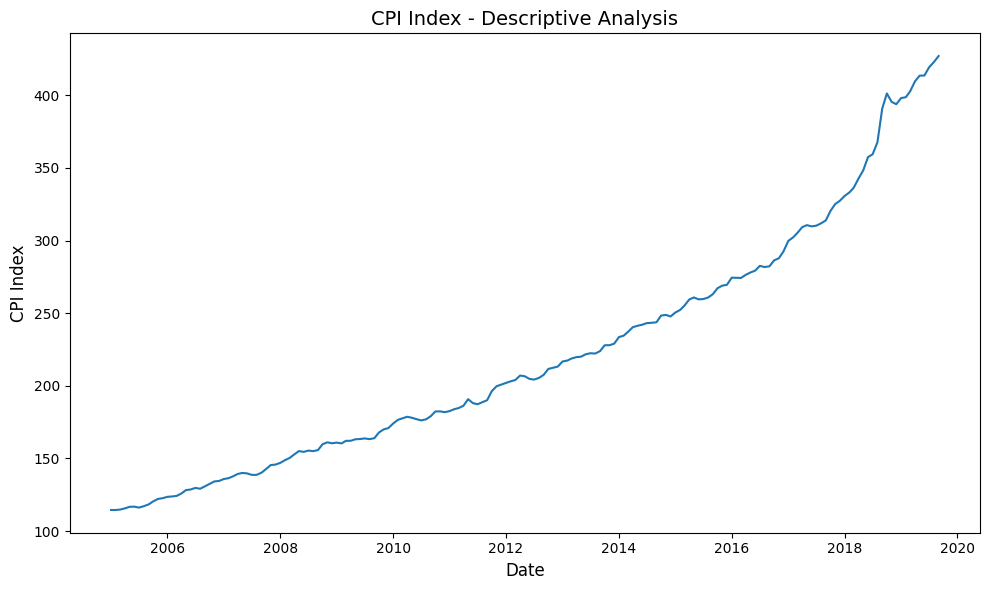

In [23]:
# Read the CSV file
data = pd.read_csv('CPI_index_clean.csv')

# Reshape the data using the melt function
melted_data = pd.melt(data, id_vars='Year', var_name='Month', value_name='CPI')

# Convert the 'Year' and 'Month' columns to datetime format
melted_data['Date'] = pd.to_datetime(melted_data['Year'].astype(str) + '-' + melted_data['Month'], format='%Y-%B')

# Set the 'Date' column as the DataFrame index
melted_data.set_index('Date', inplace=True)

# Drop the unnecessary columns
melted_data.drop(['Year', 'Month'], axis=1, inplace=True)

# Sort the data by date
melted_data.sort_index(inplace=True)

# Split the data into training and test sets
train = melted_data[:'2019-09-01']
test = melted_data['2019-09-01':'2023-04-01']

# Descriptive analysis
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['CPI'])
plt.title('CPI Index - Descriptive Analysis', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('CPI Index', fontsize=12)
plt.tight_layout()
plt.show()

# Smoothing (Moving Average)

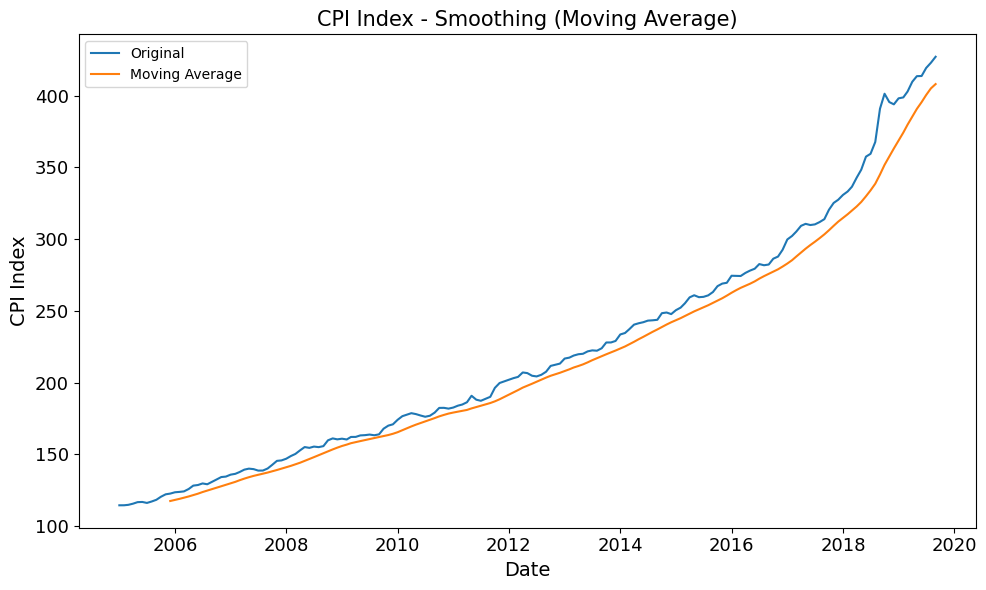

In [24]:
# Smoothing (Moving Average)
window = 12  # Choose the window size for the moving average
rolling_mean = train['CPI'].rolling(window=window).mean()

plt.figure(figsize=(10, 6))
plt.plot(train.index, train['CPI'], label='Original')
plt.plot(rolling_mean.index, rolling_mean, label='Moving Average')
plt.title('CPI Index - Smoothing (Moving Average)', fontsize=15)
plt.xlabel('Date', fontsize=14)
plt.ylabel('CPI Index', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()
plt.tight_layout()
plt.show()

# Stationarity Analysis
The provided code is performing stationarity analysis on the original data, specifically using the Dickey-Fuller test. The Dickey-Fuller test is a statistical test used to determine if a time series is stationary or not. Stationarity is an important property of a time series, as it implies that the statistical properties of the series do not change over time.

This code calculates the ADF statistic, p-value, and critical values using the Dickey-Fuller test to assess the stationarity of the time series data. The ADF statistic and p-value are key metrics used to determine the stationarity of the series, while the critical values provide a reference for making the determination.

In [25]:
# Stationarity analysis
def stationarity_analysis(data):
    # Perform Dickey-Fuller test
    result = adfuller(data)
    print('>>>\tADF Statistic:', result[0])
    print('\n>>>\tp-value:', result[1])
    print('\n>>>\tCritical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')

print('>>>\t\tStationarity Analysis - Original Data:')
stationarity_analysis(train['CPI'])

>>>		Stationarity Analysis - Original Data:
>>>	ADF Statistic: 4.765834677572072

>>>	p-value: 1.0

>>>	Critical Values:
   1%: -3.468952197801766
   5%: -2.878495056473015
   10%: -2.57580913601947


# Time Series Decomposition
The provided code performs time series decomposition using the additive model and visualizes the original data, trend, seasonality, and residuals.

For more information:
- Trend: The trend component represents the long-term pattern or direction in the data. It captures the overall upward or downward movement of the series over time.

- Seasonality: The seasonality component represents the repeating patterns or cycles within the data. It reflects regular fluctuations in the series that occur with a fixed frequency, such as daily, monthly, or yearly patterns.

- Residuals: The residuals, also known as the remainder or error component, represent the fluctuations that cannot be explained by the trend or seasonality. They capture the random or irregular variations in the series that are left after removing the trend and seasonality components. Residuals are often assumed to be noise or random fluctuations around the other components.

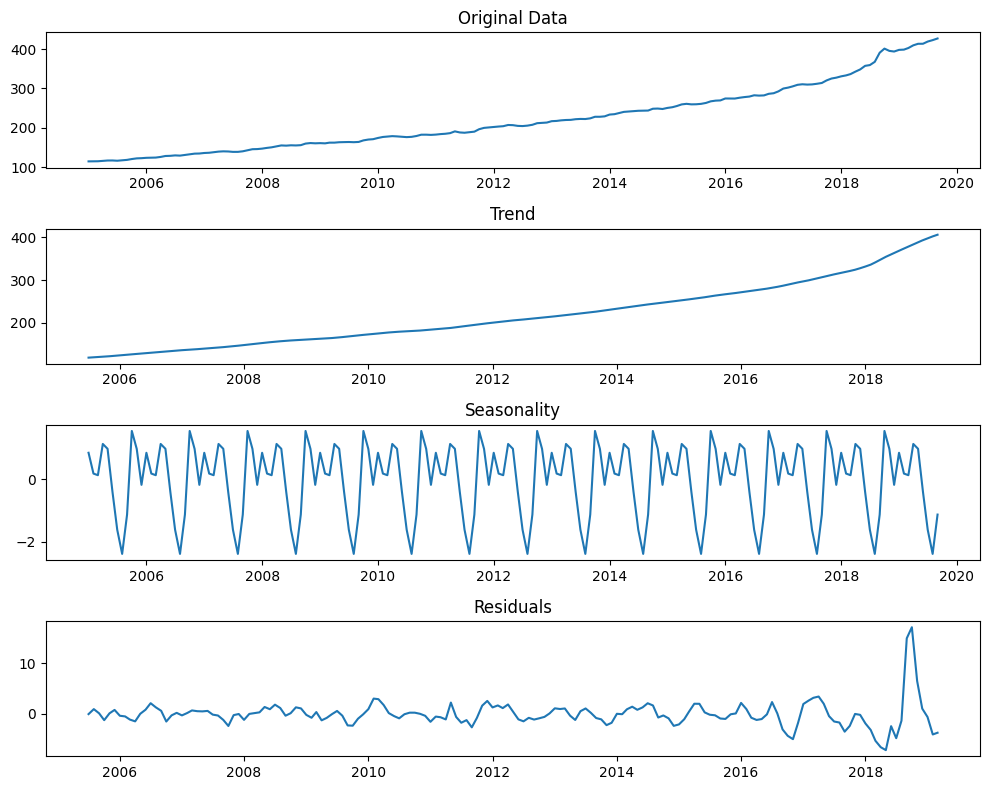

In [26]:
# Time series decomposition
decomposition = seasonal_decompose(train['CPI'], model='additive')

plt.figure(figsize=(10, 8))
plt.subplot(4, 1, 1)
plt.plot(train.index, train['CPI'])
plt.title('Original Data')
plt.subplot(4, 1, 2)
plt.plot(train.index, decomposition.trend)
plt.title('Trend')
plt.subplot(4, 1, 3)
plt.plot(train.index, decomposition.seasonal)
plt.title('Seasonality')
plt.subplot(4, 1, 4)
plt.plot(train.index, decomposition.resid)
plt.title('Residuals')
plt.tight_layout()
plt.show()

# ARIMA

In [27]:
# Read the CSV file
data = pd.read_csv('CPI_index_clean.csv')

# Reshape the data using the melt function
melted_data = pd.melt(data, id_vars='Year', var_name='Month', value_name='CPI')

# Convert the 'Year' and 'Month' columns to datetime format
melted_data['Date'] = pd.to_datetime(melted_data['Year'].astype(str) + '-' + melted_data['Month'], format='%Y-%B')

# Set the 'Date' column as the DataFrame index
melted_data.set_index('Date', inplace=True)

# Drop the unnecessary columns
melted_data.drop(['Year', 'Month'], axis=1, inplace=True)

# Sort the data by date
melted_data.sort_index(inplace=True)

# Set the frequency of the data to monthly
melted_data = melted_data.asfreq('MS')

# Split the data into training and test sets
train = melted_data[:'2019-09-01']
test = melted_data['2019-09-01':'2023-04-01']

# Addressing the Non-stationary Issue
The initial parameters provided to the model are non-stationary, which can lead to inaccurate forecasting results.

To address this issue, we can try a couple of methods:
1. **Differencing:** differencing can be used to transform it into a stationary series. We can apply differencing to the data before fitting the ARIMA model.

2. **Adjust Model Order:** Another approach is to adjust the order of the ARIMA model. The order of the model determines the number of autoregressive (p), differencing (d), and moving average (q) terms. By modifying these values, we can try different combinations to improve the model's fit.

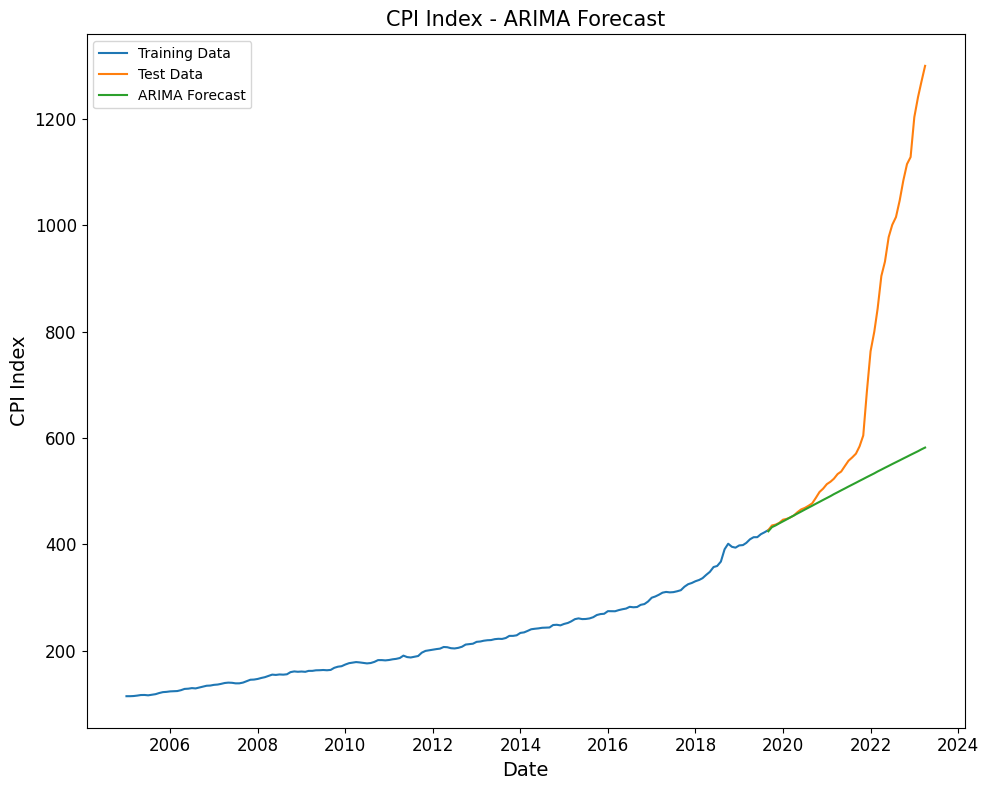

In [28]:
# Apply differencing to the training data
train_diff = train['CPI'].diff().dropna()

# Fit the ARIMA model with differenced data
model = ARIMA(train_diff, order=(1, 0, 1))
arima_model = model.fit()

# Forecast using the ARIMA model with differenced data
forecast_diff = arima_model.predict(start=test.index[0], end=test.index[-1])

# Convert the differenced forecast back to the original scale
forecast = train['CPI'].iloc[-1] + forecast_diff.cumsum()

model = ARIMA(train['CPI'], order=(2, 1, 2))  # Adjust the order as per the data characteristics

arima_model = model.fit()

# Forecast using the ARIMA model
forecast = arima_model.predict(start=test.index[0], end=test.index[-1])

# Plot the ARIMA forecast
plt.figure(figsize=(10, 8))
plt.plot(train.index, train['CPI'], label='Training Data')
plt.plot(test.index, test['CPI'], label='Test Data')
plt.plot(forecast.index, forecast, label='ARIMA Forecast')
plt.title('CPI Index - ARIMA Forecast', fontsize=15)
plt.xlabel('Date', fontsize=14)
plt.ylabel('CPI Index', fontsize=14)
plt.legend()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# The Forecasted Values of ARIMA

In [32]:
print(">>>\tThe forecast for dates after September 2019:")
print(forecast)

>>>	The forecast for dates after September 2019:
2019-09-01    424.618783
2019-10-01    432.444715
2019-11-01    435.750916
2019-12-01    439.586589
2020-01-01    443.275893
2020-02-01    446.992663
2020-03-01    450.692213
2020-04-01    454.386058
2020-05-01    458.071259
2020-06-01    461.748594
2020-07-01    465.417885
2020-08-01    469.079199
2020-09-01    472.732540
2020-10-01    476.377930
2020-11-01    480.015385
2020-12-01    483.644923
2021-01-01    487.266560
2021-02-01    490.880314
2021-03-01    494.486201
2021-04-01    498.084240
2021-05-01    501.674447
2021-06-01    505.256839
2021-07-01    508.831434
2021-08-01    512.398247
2021-09-01    515.957297
2021-10-01    519.508600
2021-11-01    523.052173
2021-12-01    526.588032
2022-01-01    530.116195
2022-02-01    533.636678
2022-03-01    537.149498
2022-04-01    540.654672
2022-05-01    544.152216
2022-06-01    547.642147
2022-07-01    551.124482
2022-08-01    554.599236
2022-09-01    558.066427
2022-10-01    561.526071
2

# Actual Test Data

In [33]:
print(test)

                CPI
Date               
2019-09-01   427.04
2019-10-01   435.59
2019-11-01   437.25
2019-12-01   440.50
2020-01-01   446.45
2020-02-01   448.02
2020-03-01   450.58
2020-04-01   454.43
2020-05-01   460.62
2020-06-01   465.84
2020-07-01   468.56
2020-08-01   472.61
2020-09-01   477.21
2020-10-01   487.38
2020-11-01   498.58
2020-12-01   504.81
2021-01-01   513.30
2021-02-01   517.96
2021-03-01   523.53
2021-04-01   532.32
2021-05-01   537.05
2021-06-01   547.48
2021-07-01   557.36
2021-08-01   563.60
2021-09-01   570.66
2021-10-01   584.32
2021-11-01   604.84
2021-12-01   686.95
2022-01-01   763.23
2022-02-01   799.93
2022-03-01   843.64
2022-04-01   904.79
2022-05-01   931.76
2022-06-01   977.90
2022-07-01  1001.03
2022-08-01  1015.65
2022-09-01  1046.89
2022-10-01  1084.00
2022-11-01  1115.26
2022-12-01  1128.45
2023-01-01  1203.48
2023-02-01  1241.33
2023-03-01  1269.75
2023-04-01  1300.04


# Comparison Between Forecast & Test Data
## Mean Squared Error
$$\Large
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

## Mean Aboslte Error
$$\Large
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$$

In [47]:
series1 = pd.Series(test.squeeze())
series2 = pd.Series(forecast.squeeze())

# Mean Squared Error (MSE)
mse = mean_squared_error(series1, series2)

# Mean Absolute Error (MAE)
mae = np.mean(np.abs(series1 - series2), axis=0)

print(">>>\tMSE:", mse)
print(">>>\tMAE:", mae)

>>>	MSE: 93591.59973882654
>>>	MAE: 192.34814747544587
